In [3]:
print("Hello world!")

Hello world!


In [4]:
import numpy as np 
import pandas as pd
df_1 =  pd.read_csv("./OIL-Price.csv", index_col = 'DATE' , parse_dates=True)
df_2 =  pd.read_csv("./Monthly.csv" , index_col = 'DATE' , parse_dates = True)
df_3 =  pd.read_csv("./Quarterly.csv" , index_col = 'DATE' , parse_dates = True)

In [5]:
df_1

,POILWTIUSDM
DATE,
1990-01-01,22.604348
1990-02-01,22.202500
1990-03-01,20.440455
1990-04-01,18.526667
1990-05-01,18.443043
...,...
2024-01-01,74.003043
2024-02-01,77.363810
2024-03-01,81.405714


In [6]:
df_2


,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-01-01,523.67347,788.17505,2137.50408,108.88889,93.77977,97.31343
2000-02-01,529.79592,791.43389,2164.42339,106.66667,94.04506,99.20398
2000-03-01,533.87755,796.08939,2184.41686,106.66667,94.66407,99.40299
2000-04-01,533.46939,795.62384,2181.99935,108.88889,95.78753,98.00995
2000-05-01,537.14286,797.02048,2191.99608,108.88889,95.54234,98.30846
...,...,...,...,...,...,...
2024-01-01,1025.73878,1441.73650,6216.26919,111.11111,417.11518,138.70647
2024-02-01,1040.46531,1448.10987,6251.55178,111.11111,416.99861,139.00498
2024-03-01,1041.28980,1453.58473,6293.27017,104.44444,418.87775,139.80100


In [7]:
df_3

,GDP_NBD19970101,ECIALLCIV_NBD20010101
DATE,,
2000-01-01,119.60530,.
2000-04-01,122.54147,.
2000-07-01,123.38384,.
2000-10-01,124.78984,.
2001-01-01,125.20224,100.00000
...,...,...
2023-01-01,320.63503,185.83235
2023-04-01,323.61746,187.72137
2023-07-01,330.15984,189.61039


In [8]:
df_1.isnull().sum()

POILWTIUSDM    0
dtype: int64

In [9]:
df_2.isnull().sum()

PPIACO_NBD19470101                 0
CPIAUCSL_NBD19470101               0
PCE_NBD19590101                    0
FRBATLWGT3MMAUMHWGO_NBD19970301    0
M2SL_NBD20010101                   0
IR_NBD20010101                     0
dtype: int64

In [10]:
df_3.isnull().sum()

GDP_NBD19970101          0
ECIALLCIV_NBD20010101    0
dtype: int64

In [11]:
def check_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] > Q3 + 1.5 * IQR) | (df[col] < Q1 - 1.5 * (IQR))]

In [12]:
df_1

,POILWTIUSDM
DATE,
1990-01-01,22.604348
1990-02-01,22.202500
1990-03-01,20.440455
1990-04-01,18.526667
1990-05-01,18.443043
...,...
2024-01-01,74.003043
2024-02-01,77.363810
2024-03-01,81.405714


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 413 entries, 1990-01-01 to 2024-05-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   POILWTIUSDM  413 non-null    float64
dtypes: float64(1)
memory usage: 6.5 KB


In [14]:
df_1.duplicated()

DATE
1990-01-01    False
1990-02-01    False
1990-03-01    False
1990-04-01    False
1990-05-01    False
              ...  
2024-01-01    False
2024-02-01    False
2024-03-01    False
2024-04-01    False
2024-05-01    False
Length: 413, dtype: bool

In [15]:
# ensure data in df_1 is numeric
df_1 = df_1.apply(pd.to_numeric, errors='coerce')



In [16]:

df_1.isnull().sum()

POILWTIUSDM    0
dtype: int64

In [17]:
df_1.dropna(inplace=True)
# # drop missing values

In [18]:
# get date time from 2000-01-1
df_1 = df_1[df_1.index >= '2000-01-01']

In [19]:

df_1.isnull().sum()

POILWTIUSDM    0
dtype: int64

In [20]:
df_1.describe()

,POILWTIUSDM
count,293.000000
mean,63.418459
std,25.578754
min,16.975000
25%,42.912857
50%,61.544000
75%,83.277619
max,133.958261


In [21]:

df_1_quarterly = df_1.resample('QS').mean()

In [22]:
df_1_quarterly

,POILWTIUSDM
DATE,
2000-01-01,28.826280
2000-04-01,28.830523
2000-07-01,31.687502
2000-10-01,32.006032
2001-01-01,28.769013
...,...
2023-04-01,73.702265
2023-07-01,82.126743
2023-10-01,78.354690


In [23]:
df_1[df_1['POILWTIUSDM']=='.'].value_counts().sum()

0

In [24]:
df_2[df_2['FRBATLWGT3MMAUMHWGO_NBD19970301']=='.'].value_counts().sum()

2

In [25]:
df_2[df_2['IR_NBD20010101']=='.'].value_counts().sum()

0

In [26]:
df_2

,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-01-01,523.67347,788.17505,2137.50408,108.88889,93.77977,97.31343
2000-02-01,529.79592,791.43389,2164.42339,106.66667,94.04506,99.20398
2000-03-01,533.87755,796.08939,2184.41686,106.66667,94.66407,99.40299
2000-04-01,533.46939,795.62384,2181.99935,108.88889,95.78753,98.00995
2000-05-01,537.14286,797.02048,2191.99608,108.88889,95.54234,98.30846
...,...,...,...,...,...,...
2024-01-01,1025.73878,1441.73650,6216.26919,111.11111,417.11518,138.70647
2024-02-01,1040.46531,1448.10987,6251.55178,111.11111,416.99861,139.00498
2024-03-01,1041.28980,1453.58473,6293.27017,104.44444,418.87775,139.80100


In [27]:
df_2.replace('.', np.nan, inplace=True)
df_2

,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-01-01,523.67347,788.17505,2137.50408,108.88889,93.77977,97.31343
2000-02-01,529.79592,791.43389,2164.42339,106.66667,94.04506,99.20398
2000-03-01,533.87755,796.08939,2184.41686,106.66667,94.66407,99.40299
2000-04-01,533.46939,795.62384,2181.99935,108.88889,95.78753,98.00995
2000-05-01,537.14286,797.02048,2191.99608,108.88889,95.54234,98.30846
...,...,...,...,...,...,...
2024-01-01,1025.73878,1441.73650,6216.26919,111.11111,417.11518,138.70647
2024-02-01,1040.46531,1448.10987,6251.55178,111.11111,416.99861,139.00498
2024-03-01,1041.28980,1453.58473,6293.27017,104.44444,418.87775,139.80100


In [28]:
df_2.isnull().sum()

PPIACO_NBD19470101                 0
CPIAUCSL_NBD19470101               0
PCE_NBD19590101                    0
FRBATLWGT3MMAUMHWGO_NBD19970301    2
M2SL_NBD20010101                   0
IR_NBD20010101                     0
dtype: int64

In [29]:
df_2.dropna(inplace=True)
df_2

,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-01-01,523.67347,788.17505,2137.50408,108.88889,93.77977,97.31343
2000-02-01,529.79592,791.43389,2164.42339,106.66667,94.04506,99.20398
2000-03-01,533.87755,796.08939,2184.41686,106.66667,94.66407,99.40299
2000-04-01,533.46939,795.62384,2181.99935,108.88889,95.78753,98.00995
2000-05-01,537.14286,797.02048,2191.99608,108.88889,95.54234,98.30846
...,...,...,...,...,...,...
2023-11-01,1032.06531,1434.00372,6175.43287,115.55556,416.12436,138.70647
2023-12-01,1019.86122,1437.34637,6211.59752,115.55556,417.10714,137.71144
2024-01-01,1025.73878,1441.73650,6216.26919,111.11111,417.11518,138.70647


In [30]:
df_2.isnull().sum()

PPIACO_NBD19470101                 0
CPIAUCSL_NBD19470101               0
PCE_NBD19590101                    0
FRBATLWGT3MMAUMHWGO_NBD19970301    0
M2SL_NBD20010101                   0
IR_NBD20010101                     0
dtype: int64

In [31]:
# ensure data in df_1 is numeric
df_2 = df_2.apply(pd.to_numeric, errors='coerce')
df_2
df_2_quarterly = df_2.resample('QS').mean() 


In [32]:
df_2.resample('QS').mean()

,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-01-01,529.115647,791.899443,2162.114777,107.407410,94.162967,98.640133
2000-04-01,538.911567,798.106767,2192.714800,109.629630,95.743983,98.673300
2000-07-01,545.986397,805.400370,2228.019167,114.074073,96.871460,100.232173
2000-10-01,553.197280,811.142147,2260.241750,118.518520,98.307777,100.464347
2001-01-01,562.312927,818.901303,2285.298923,118.518520,100.902387,99.071313
...,...,...,...,...,...,...
2023-01-01,1055.725170,1402.248603,5968.496133,137.777780,423.902163,140.033167
2023-04-01,1040.051703,1412.787090,6017.314603,131.111110,418.050393,139.104480
2023-07-01,1048.229930,1424.740843,6102.417510,120.000003,417.157383,139.535657


In [33]:
df_2.resample('M').mean()

,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-01-31,523.67347,788.17505,2137.50408,108.88889,93.77977,97.31343
2000-02-29,529.79592,791.43389,2164.42339,106.66667,94.04506,99.20398
2000-03-31,533.87755,796.08939,2184.41686,106.66667,94.66407,99.40299
2000-04-30,533.46939,795.62384,2181.99935,108.88889,95.78753,98.00995
2000-05-31,537.14286,797.02048,2191.99608,108.88889,95.54234,98.30846
...,...,...,...,...,...,...
2023-11-30,1032.06531,1434.00372,6175.43287,115.55556,416.12436,138.70647
2023-12-31,1019.86122,1437.34637,6211.59752,115.55556,417.10714,137.71144
2024-01-31,1025.73878,1441.73650,6216.26919,111.11111,417.11518,138.70647


In [34]:
df_2.resample('Q').mean() 

,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-03-31,529.115647,791.899443,2162.114777,107.407410,94.162967,98.640133
2000-06-30,538.911567,798.106767,2192.714800,109.629630,95.743983,98.673300
2000-09-30,545.986397,805.400370,2228.019167,114.074073,96.871460,100.232173
2000-12-31,553.197280,811.142147,2260.241750,118.518520,98.307777,100.464347
2001-03-31,562.312927,818.901303,2285.298923,118.518520,100.902387,99.071313
...,...,...,...,...,...,...
2023-03-31,1055.725170,1402.248603,5968.496133,137.777780,423.902163,140.033167
2023-06-30,1040.051703,1412.787090,6017.314603,131.111110,418.050393,139.104480
2023-09-30,1048.229930,1424.740843,6102.417510,120.000003,417.157383,139.535657


In [35]:
df_2_quarterly

,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-01-01,529.115647,791.899443,2162.114777,107.407410,94.162967,98.640133
2000-04-01,538.911567,798.106767,2192.714800,109.629630,95.743983,98.673300
2000-07-01,545.986397,805.400370,2228.019167,114.074073,96.871460,100.232173
2000-10-01,553.197280,811.142147,2260.241750,118.518520,98.307777,100.464347
2001-01-01,562.312927,818.901303,2285.298923,118.518520,100.902387,99.071313
...,...,...,...,...,...,...
2023-01-01,1055.725170,1402.248603,5968.496133,137.777780,423.902163,140.033167
2023-04-01,1040.051703,1412.787090,6017.314603,131.111110,418.050393,139.104480
2023-07-01,1048.229930,1424.740843,6102.417510,120.000003,417.157383,139.535657


In [36]:
df_3.replace('.', np.nan, inplace=True)


In [37]:
df_3.isnull().sum()

GDP_NBD19970101          0
ECIALLCIV_NBD20010101    4
dtype: int64

In [38]:
df_3.dropna(inplace=True)

In [39]:
df_3.isnull().sum()


GDP_NBD19970101          0
ECIALLCIV_NBD20010101    0
dtype: int64

In [40]:
df_3.dtypes

GDP_NBD19970101          float64
ECIALLCIV_NBD20010101     object
dtype: object

In [41]:
# convert dtype object to float 64
df_3['ECIALLCIV_NBD20010101'] = df_3['ECIALLCIV_NBD20010101'].astype('float64')

In [42]:
df_3.dtypes

GDP_NBD19970101          float64
ECIALLCIV_NBD20010101    float64
dtype: object

In [43]:
df_3_quarterly =  df_3.resample('QS').mean() 

In [44]:
df_2_quarterly

,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101
DATE,,,,,,
2000-01-01,529.115647,791.899443,2162.114777,107.407410,94.162967,98.640133
2000-04-01,538.911567,798.106767,2192.714800,109.629630,95.743983,98.673300
2000-07-01,545.986397,805.400370,2228.019167,114.074073,96.871460,100.232173
2000-10-01,553.197280,811.142147,2260.241750,118.518520,98.307777,100.464347
2001-01-01,562.312927,818.901303,2285.298923,118.518520,100.902387,99.071313
...,...,...,...,...,...,...
2023-01-01,1055.725170,1402.248603,5968.496133,137.777780,423.902163,140.033167
2023-04-01,1040.051703,1412.787090,6017.314603,131.111110,418.050393,139.104480
2023-07-01,1048.229930,1424.740843,6102.417510,120.000003,417.157383,139.535657


In [45]:
df_3_quarterly

,GDP_NBD19970101,ECIALLCIV_NBD20010101
DATE,,
2001-01-01,125.20224,100.00000
2001-04-01,126.74205,100.94451
2001-07-01,126.73033,102.00708
2001-10-01,127.47704,102.95159
2002-01-01,128.94828,103.77804
...,...,...
2023-01-01,320.63503,185.83235
2023-04-01,323.61746,187.72137
2023-07-01,330.15984,189.61039


In [46]:
df_merged = df_1_quarterly.join(df_2_quarterly)

In [47]:
df_merged = df_merged.join(df_3_quarterly)

In [48]:
df_merged = df_merged[4:-1]
df_merged

,POILWTIUSDM,PPIACO_NBD19470101,CPIAUCSL_NBD19470101,PCE_NBD19590101,FRBATLWGT3MMAUMHWGO_NBD19970301,M2SL_NBD20010101,IR_NBD20010101,GDP_NBD19970101,ECIALLCIV_NBD20010101
DATE,,,,,,,,,
2001-01-01,28.769013,562.312927,818.901303,2285.298923,118.518520,100.902387,99.071313,125.20224,100.00000
2001-04-01,27.888399,556.054420,824.643077,2300.631600,115.555557,103.452110,97.313433,126.74205,100.94451
2001-07-01,26.704912,544.353743,826.970823,2309.811610,113.333333,105.774060,95.522390,126.73033,102.00708
2001-10-01,20.370715,528.163263,826.350090,2348.023520,111.111110,108.203870,92.006633,127.47704,102.95159
2002-01-01,21.630329,526.122450,828.988207,2357.965810,105.185183,110.086353,91.542290,128.94828,103.77804
...,...,...,...,...,...,...,...,...,...
2023-01-01,76.209042,1055.725170,1402.248603,5968.496133,137.777780,423.902163,140.033167,320.63503,185.83235
2023-04-01,73.702265,1040.051703,1412.787090,6017.314603,131.111110,418.050393,139.104480,323.61746,187.72137
2023-07-01,82.126743,1048.229930,1424.740843,6102.417510,120.000003,417.157383,139.535657,330.15984,189.61039


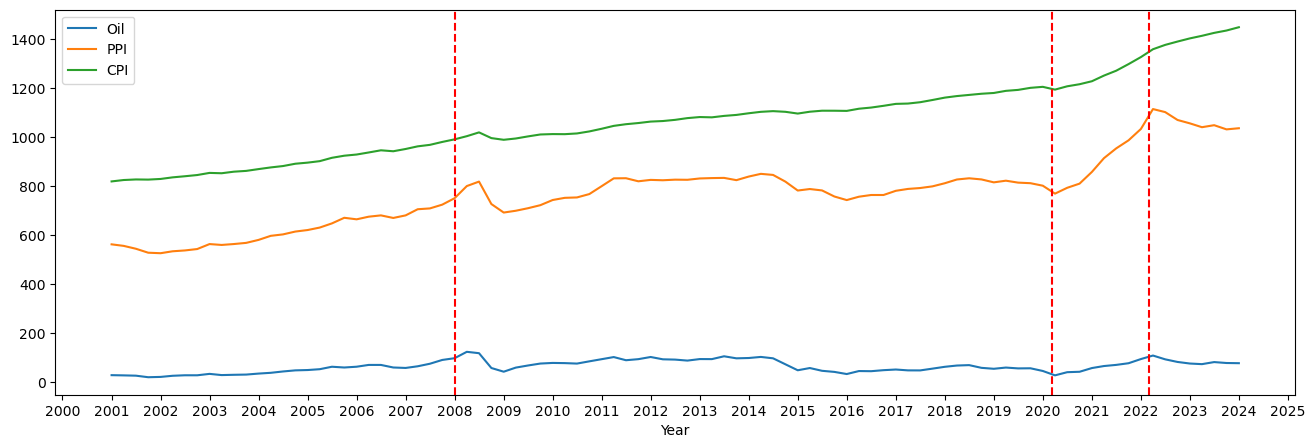

In [66]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

fig , axes = plt.subplots(figsize=(16,5))

axes.plot(df_merged["POILWTIUSDM"], label="Oil")
axes.plot(df_merged["PPIACO_NBD19470101"], label="PPI")
axes.plot(df_merged["CPIAUCSL_NBD19470101"], label="CPI")

axes.legend()

# Set the x-axis label
axes.set_xlabel('Year')

# Turn off minor ticks
axes.minorticks_off()

# Set major tick positions to show only years
axes.xaxis.set_major_locator(mdates.YearLocator())

# Format the major tick labels to display only the year
axes.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

# Replace the date below with your desired date

important_events = [
    datetime.datetime(2022, 3, 4),          # russian oil sanctions 
    datetime.datetime(2020, 3, 11),         # COVID
    datetime.datetime(2008, 1, 1),         # Great Recession
]

# Add a vertical line at the specified date
plt.axvline(important_events[0], color='red', linestyle='--', label='Feb 2022')
plt.axvline(important_events[1], color='red', linestyle='--', label='March 2020')
plt.axvline(important_events[2], color='red', linestyle='--', label='Jan 2008')

plt.show()